In [1]:
!pip install bs4

     |████████████████████████████████| 115 kB 500 kB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=aff851801a61227cd8b57c6dbe8b423dfed38e80396497e1e38759c9e8bae716
  Stored in directory: /Users/jaecheolchoi/Library/Caches/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "http://beans.itcarlow.ie/prices.html"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<html>
 <head>
  <title>
   Welcome to the Beans'R'Us Pricing Page
  </title>
  <link href="beansrus.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <h2>
   Welcome to the Beans'R'Us Pricing Page
  </h2>
  <p>
   Current price of coffee beans =
   <strong>
    $5.43
   </strong>
  </p>
  <p>
   Price valid for 15 minutes from Mon Nov  2 06:49:02 2020.
  </p>
 </body>
</html>



### 네이버 IT 베스트셀러 크롤링

In [4]:
url = "https://book.naver.com/category/index.nhn?cate_code=280020&tab=top100&list_type=list&sort_type=publishday&page=1"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   TOP100, IT 전문서, 컴퓨터/IT : 네이버 책
  </title>
  <meta content="article" property="og:type"/>
  <meta content="네이버 책" property="og:title"/>
  <meta content="http://book.naver.com/category/index.nhn?cate_code=280020&amp;tab=top100&amp;list_type=list&amp;sort_type=publishday&amp;page=1" property="og:url"/>
  <meta content="https://ssl.pstatic.net/static/m/book/icons/book_og_270x270.png" property="og:image"/>
  <meta content="책으로 만나는 새로운 세상" property="og:description"/>
  <meta content="" property="og:article:thumbnailUrl"/>
  <meta content="네이버 책" property="og:article:author"/>
  <meta content="https://book.naver.com" property="og:article:author:url"/>
  <link href="https://www.naver.com/favicon.ico?book" rel="shortcut icon" type="image/x-icon"/>
  <script type="text/javascript">
   var __bLogin = false;
var __bAdu

In [8]:
soup.find_all(class_='N=a:bta.title')
soup.find_all(class_='N=a:bta.title')[0]

<a class="N=a:bta.title" href="http://book.naver.com/bookdb/book_detail.nhn?bid=15431390">한국어 임베딩</a>

In [9]:
len(soup.find_all(class_='N=a:bta.title'))

20

In [11]:
title = [title.string for title in soup.find_all(class_ ='N=a:bta.title')]
title

['한국어 임베딩',
 'Do it! 정직하게 코딩하며 배우는 딥러닝 입문',
 '데이터 분석 전문가 가이드',
 'SQL 전문가 가이드',
 '리액트를 다루는 기술',
 '나는 LINE 개발자입니다',
 '클린 아키텍처',
 '한 권으로 끝내는 아두이노 입문 + 실전(종합편)',
 '다시 미분 적분',
 '파이썬 날코딩으로 알고 짜는 딥러닝',
 '소문난 명강의 김기현의 자연어 처리 딥러닝 캠프',
 'Do it! 점프 투 파이썬',
 '오브젝트',
 '혼자 공부하는 파이썬',
 '혼자 공부하는 C 언어',
 '혼자 공부하는 자바',
 '머신 러닝 교과서 with 파이썬, 사이킷런, 텐서플로',
 '파이썬 라이브러리를 활용한 데이터 분석',
 '알고리즘 트레이닝',
 '밑바닥부터 시작하는 딥러닝 2']

In [16]:
# 제목 가져왔으니 이제 평점 시도!
soup.find('dd', 'txt_desc')

<dd class="txt_desc">
<div class="review_point">
<span style="width:100%;"></span>
</div>
								10.0<span class="bar"> | </span>
<a class="N=a:bta.review" href="http://book.naver.com/bookdb/review.nhn?bid=15431390">네티즌리뷰 1건</a>
<span class="bar">|</span>
<a class="N=a:bta.bookbuy" href="javascript:showBuyLayerByBid('15431390')" id="buy_btn_15431390" onclick="return showAdultLayer('15431390', 'false', 'false', 'false');"><img alt="도서구매" class="btn v2" height="20" id="btn_buy_15431390" src="https://ssl.pstatic.net/static/book/image/btn_book_buy.gif" title="구매 가능한 도서입니다." width="48"/></a>
<strike>35,000원</strike> → <em class="price">31,500원(-10%)</em>
<!--  ebook 가격 정보 -->
<a class="N=a:bta.ebookbuy" href="javascript:showEbookBuyLayerByBid('15431390')" id="ebook_buy_btn_15431390" onclick="return showAdultLayer('15431390', 'false', 'false', 'false');"><img alt="ebook구매" class="btn v2" height="20" id="btn_ebook_buy_15431390" src="https://ssl.pstatic.net/static/book/image/btn_ebook_buy5.pn

In [24]:
# split을 이용한 평점 가져오기
soup.find('dd', 'txt_desc').text.strip()

'10.0 | \n네티즌리뷰 1건\n|\n\n35,000원 → 31,500원(-10%)\n\n25,200원'

In [40]:
soup.find('dd', 'txt_desc').get_text()

'\n\n\n\r\n\t\t\t\t\t\t\t\t10.0 | \n네티즌리뷰 1건\n|\n\n35,000원 → 31,500원(-10%)\n\n25,200원\r\n\t\t\t\t\t\t\t\t\t\t\t\n'

In [26]:
# split을 이용
soup.find('dd', 'txt_desc').text.strip().split("|")[0].strip()

'10.0'

In [27]:
# Regular Expression(정규표현식)을 이용
import re

search_target = '''Luke skywarker 02-123-4567 luke@daum.net
다스베이더 070-9999-9999 darth_vader@gmail.com 서울시 서초구 서초동 서초아파트
princess leia 010 2454 3457 leia@gmail.com'''

In [28]:
re.search('\d+', search_target).group()

'02'

In [29]:
re.search('\d+-\d+-\d+', search_target).group()

'02-123-4567'

In [30]:
re.findall('\d+-\d+-\d+', search_target)

['02-123-4567', '070-9999-9999']

In [31]:
re.findall('\w+@\w+[.]\w+', search_target)

['luke@daum.net', 'darth_vader@gmail.com', 'leia@gmail.com']

In [32]:
re.findall('[가-힣]+', search_target)

['다스베이더', '서울시', '서초구', '서초동', '서초아파트']

In [34]:
re.findall('[가-힣]+시\s[가-힣]+구\s[가-힣]+동', search_target)

['서울시 서초구 서초동']

In [35]:
re.search('[가-힣]+아파트', search_target).span()

(95, 100)

In [37]:
search_target[95:100]

'서초아파트'

In [41]:
# 배웠으니 구해보자
tmp = soup.find('dd', 'txt_desc').get_text()
result = re.search('\d+.(\d+)?', tmp)

if result:
    print(result.group())

10.0


In [44]:
score = []

for each in soup.find_all('dd', 'txt_desc'):
    result = re.search('\d+.(\d+)?', each.get_text())
    
    score.append(result.group())
    
score

['10.0',
 '10.0',
 '0.0',
 '7.5',
 '0.0',
 '9.5',
 '0.0',
 '0.0',
 '9.0',
 '10.0',
 '0.0',
 '10.0',
 '0.0',
 '9.0',
 '0.0',
 '10.0',
 '0.0',
 '0.0',
 '10.0',
 '9.329999923706055']

In [45]:
# 출판 연도도 가져오기
soup.find('dd', 'txt_block').get_text()

'\n 이기창 저 |\n에이콘출판 | 2019.09.26'

In [48]:
date = []
for each in soup.find_all('dd', 'txt_block'):
    result = re.search("\d+.\d+.\d+.", each.get_text())
    
    date.append(result.group())
    
date

['2019.09.26',
 '2019.09.20',
 '2019.09.06',
 '2019.09.06',
 '2019.08.31',
 '2019.08.23',
 '2019.08.20',
 '2019.08.15',
 '2019.07.31',
 '2019.07.15',
 '2019.07.01',
 '2019.06.20',
 '2019.06.17',
 '2019.06.10',
 '2019.06.10',
 '2019.06.10',
 '2019.05.24',
 '2019.05.20',
 '2019.05.09',
 '2019.05.01']

In [51]:
import pandas as pd
bestseller = pd.DataFrame({"책제목": title,
                          "평점": score,
                          "출판일": date},
                          index=range(1, 21))
bestseller

,책제목,평점,출판일
1,한국어 임베딩,10.0,2019.09.26
2,Do it! 정직하게 코딩하며 배우는 딥러닝 입문,10.0,2019.09.20
3,데이터 분석 전문가 가이드,0.0,2019.09.06
4,SQL 전문가 가이드,7.5,2019.09.06
5,리액트를 다루는 기술,0.0,2019.08.31
6,나는 LINE 개발자입니다,9.5,2019.08.23
7,클린 아키텍처,0.0,2019.08.20
8,한 권으로 끝내는 아두이노 입문 + 실전(종합편),0.0,2019.08.15
9,다시 미분 적분,9.0,2019.07.31
10,파이썬 날코딩으로 알고 짜는 딥러닝,10.0,2019.07.15


In [53]:
# 반올림 후 실수 형변환
pd.options.display.float_format = '{:.2f}'.format
bestseller["평점"] = bestseller["평점"].astype(float)
bestseller

,책제목,평점,출판일
1,한국어 임베딩,10.00,2019.09.26
2,Do it! 정직하게 코딩하며 배우는 딥러닝 입문,10.00,2019.09.20
3,데이터 분석 전문가 가이드,0.00,2019.09.06
4,SQL 전문가 가이드,7.50,2019.09.06
5,리액트를 다루는 기술,0.00,2019.08.31
6,나는 LINE 개발자입니다,9.50,2019.08.23
7,클린 아키텍처,0.00,2019.08.20
8,한 권으로 끝내는 아두이노 입문 + 실전(종합편),0.00,2019.08.15
9,다시 미분 적분,9.00,2019.07.31
10,파이썬 날코딩으로 알고 짜는 딥러닝,10.00,2019.07.15


### 네이버 영화 평점

In [56]:
url ="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20201101"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&amp;date=20201101" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [64]:
# 영화 이름
soup.find_all("div", "tit5")[0].a.string

'부활: 그 증거'

In [65]:
movie_name = [each.a.string for each in soup.find_all("div", "tit5")]
movie_name

['부활: 그 증거',
 '그린 북',
 '가버나움',
 '디지몬 어드벤처 라스트 에볼루션 : 인연',
 '먼 훗날 우리',
 '베일리 어게인',
 '아일라',
 '원더',
 '포드 V 페라리',
 '당갈',
 '주전장',
 '쇼생크 탈출',
 '터미네이터 2:오리지널',
 '덕구',
 '보헤미안 랩소디',
 '라이언 일병 구하기',
 '월-E',
 '나 홀로 집에',
 '클래식',
 '헬프',
 '사운드 오브 뮤직',
 '매트릭스',
 '인생은 아름다워',
 '살인의 추억',
 '소년시절의 너',
 '포레스트 검프',
 '빽 투 더 퓨쳐',
 '위대한 쇼맨',
 '글래디에이터',
 '그대, 고맙소 : 김호중 생애 첫 팬미팅 무비',
 '센과 치히로의 행방불명',
 '타이타닉',
 '토이 스토리 3',
 '어벤져스: 엔드게임',
 '알라딘',
 '헌터 킬러',
 '아이즈 온 미 : 더 무비',
 '캐스트 어웨이',
 '죽은 시인의 사회',
 '레옹',
 '동주',
 '반지의 제왕: 왕의 귀환',
 '히든 피겨스',
 '아이 캔 스피크',
 '집으로...',
 '브레이크 더 사일런스: 더 무비',
 '안녕 베일리',
 '쉰들러 리스트',
 '서유기 2 - 선리기연',
 '클레멘타인']

In [67]:
# 영화 평점
soup.find_all("td", "point")[0].string

'9.59'

In [69]:
movie_point = [each.string for each in soup.find_all("td", "point")]
movie_point

['9.59',
 '9.59',
 '9.59',
 '9.56',
 '9.55',
 '9.53',
 '9.50',
 '9.50',
 '9.49',
 '9.48',
 '9.48',
 '9.44',
 '9.44',
 '9.42',
 '9.42',
 '9.41',
 '9.41',
 '9.41',
 '9.41',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.39',
 '9.39',
 '9.39',
 '9.39',
 '9.38',
 '9.38',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.36',
 '9.36',
 '9.36',
 '9.36',
 '9.36',
 '9.36']

In [70]:
# 날짜별 크롤링
date = pd.date_range("2019.03.01", periods=45, freq="D")
date

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16',
               '2019-03-17', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
               '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
               '2019-04-06', '2019-04-07', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13',
               '2019-04-14'],
              dtype='datetime64[ns]', freq='D')

In [71]:
date[0].strftime("%y-%m-%d")

'19-03-01'

In [72]:
# 우리가 원하는 형태
date[0].strftime("%Y%m%d")

'20190301'

In [73]:
import time
movie_date = []
movie_name = []
movie_point = []

In [74]:
for today in date:
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date={date}"
    response = urlopen(html.format(date = today.strftime("%Y%m%d")))
    soup = BeautifulSoup(response, "html.parser")
    
    movie_date.extend([today]*len(soup.find_all("td", "point")))
    movie_name.extend([each.a.string for each in soup.find_all("div", "tit5")])
    movie_point.extend([each.string for each in soup.find_all("td", "point")])
    
    print(str(today))
    time.sleep(0.5)

2019-03-01 00:00:00
2019-03-02 00:00:00
2019-03-03 00:00:00
2019-03-04 00:00:00
2019-03-05 00:00:00
2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-09 00:00:00
2019-03-10 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00
2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00
2019-03-31 00:00:00
2019-04-01 00:00:00
2019-04-02 00:00:00
2019-04-03 00:00:00
2019-04-04 00:00:00
2019-04-05 00:00:00
2019-04-06 00:00:00
2019-04-07 00:00:00
2019-04-08 00:00:00
2019-04-09 00:00:00
2019-04-10 00:00:00
2019-04-11 00:00:00
2019-04-12 00:00:00
2019-04-13 00:00:00
2019-04-14 00:00:00


In [75]:
len(movie_date), len(movie_name), len(movie_point)

(2250, 2250, 2250)

In [77]:
movie = pd.DataFrame({"date": movie_date, "name": movie_name, "point": movie_point})
movie.head()

,date,name,point
0,2019-03-01,그린 북,9.63
1,2019-03-01,가버나움,9.60
2,2019-03-01,베일리 어게인,9.55
3,2019-03-01,아일라,9.46
4,2019-03-01,당갈,9.46


In [79]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2250 non-null   datetime64[ns]
 1   name    2250 non-null   object        
 2   point   2250 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 52.9+ KB


In [81]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2250 non-null   datetime64[ns]
 1   name    2250 non-null   object        
 2   point   2250 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.9+ KB


In [82]:
movie.to_csv("./data/04_naver_movie_raw_data.csv", sep=",", encoding="utf-8")

In [83]:
# 데이터 다뤄보기

In [85]:
import numpy as np
import pandas as pd

movie = pd.read_csv("./data/04_naver_movie_raw_data.csv", index_col=0)
movie.head()

,date,name,point
0,2019-03-01,그린 북,9.63
1,2019-03-01,가버나움,9.60
2,2019-03-01,베일리 어게인,9.55
3,2019-03-01,아일라,9.46
4,2019-03-01,당갈,9.46


In [88]:
movie_unique = pd.pivot_table(movie, index=["name"], aggfunc=np.sum)
movie_unique.head()

,point
name,
가버나움,431.95
굿 윌 헌팅,420.30
굿바이 마이 프랜드,420.75
그대를 사랑합니다,196.09
그린 북,433.06


In [89]:
movie_best = movie_unique.sort_values(by="point", ascending=False)
movie_best.head(10)

,point
name,
그린 북,433.06
가버나움,431.95
베일리 어게인,429.68
아일라,426.13
당갈,425.21
원더,424.39
보헤미안 랩소디,424.28
쇼생크 탈출,423.90
덕구,423.86


In [93]:
movie.query("name == ['터미네이터 2']")

,date,name,point
10,2019-03-01,터미네이터 2,9.40
61,2019-03-02,터미네이터 2,9.40
110,2019-03-03,터미네이터 2,9.40
160,2019-03-04,터미네이터 2,9.40
210,2019-03-05,터미네이터 2,9.40
259,2019-03-06,터미네이터 2,9.40
309,2019-03-07,터미네이터 2,9.40
359,2019-03-08,터미네이터 2,9.40
409,2019-03-09,터미네이터 2,9.40
459,2019-03-10,터미네이터 2,9.40


No handles with labels found to put in legend.


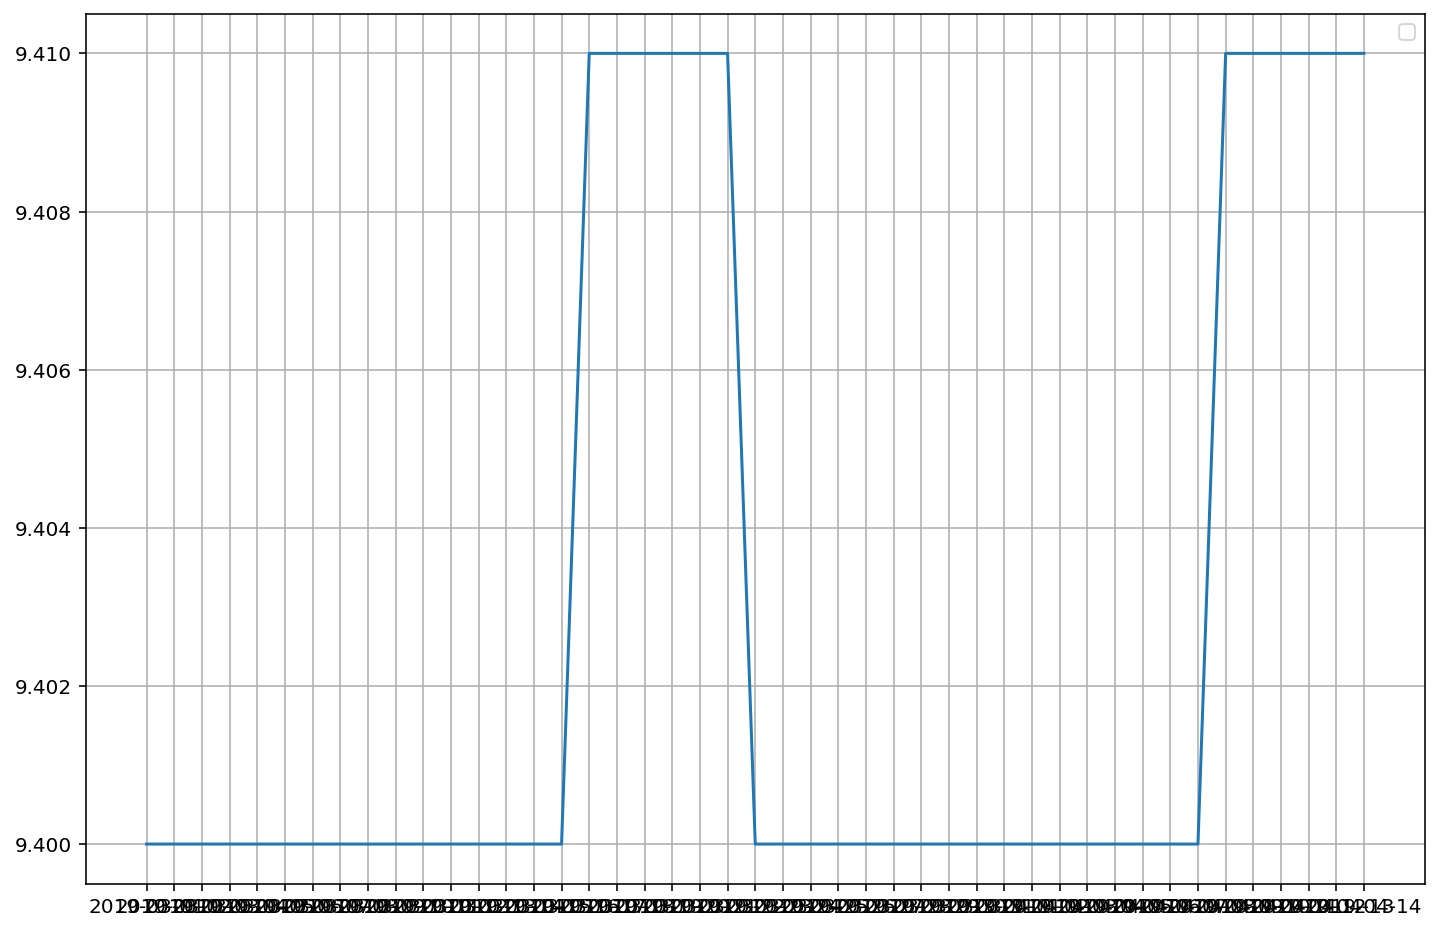

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(movie.query("name == ['터미네이터 2']")["date"],
        movie.query("name == ['터미네이터 2']")["point"])
plt.legend(loc="best")
plt.grid()
plt.show()

In [97]:
movie_best.tail()

,point
name,
메리 포핀스,141.40
언터처블: 1%의 우정,65.31
로망,56.31
모노노케 히메,37.36
클레멘타인,27.99


In [98]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=["name"])
movie_pivot.columns = movie_pivot.columns.droplevel([0])
movie_pivot.head()

name,가버나움,굿 윌 헌팅,굿바이 마이 프랜드,그대를 사랑합니다,그린 북,글래디에이터,나 홀로 집에,다시 태어나도 우리,당갈,덕구,...,클래식,클레멘타인,터미네이터 2,토이 스토리 3,패왕별희,포레스트 검프,폴란드로 간 아이들,헌터 킬러,헬프,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,9.60,9.34,9.35,nan,9.63,9.38,9.39,9.36,9.46,9.42,...,9.36,nan,9.40,9.38,9.36,9.39,9.40,9.38,9.38,9.34
2019-03-02,9.60,9.34,9.35,nan,9.63,9.38,9.39,9.36,9.46,9.42,...,9.37,nan,9.40,9.38,9.36,9.39,9.40,9.38,9.38,9.34
2019-03-03,9.60,9.34,9.35,nan,9.63,9.38,9.39,9.36,9.46,9.42,...,9.37,nan,9.40,9.38,9.36,9.39,9.40,9.38,9.38,9.34
2019-03-04,9.60,9.34,9.35,nan,9.63,9.38,9.39,9.36,9.46,9.42,...,9.37,nan,9.40,9.38,9.36,9.39,9.40,9.38,9.38,9.34
2019-03-05,9.60,9.34,9.35,nan,9.63,9.38,9.39,9.36,9.46,9.42,...,9.37,nan,9.40,9.38,9.36,9.39,9.40,9.38,9.38,9.34


In [99]:
movie_pivot.to_excel("./data/04_movie_pivot.xlsx")

In [100]:
movie_pivot.columns

Index(['가버나움', '굿 윌 헌팅', '굿바이 마이 프랜드', '그대를 사랑합니다', '그린 북', '글래디에이터',
       '나 홀로 집에', '다시 태어나도 우리', '당갈', '덕구', '동주', '라이언 일병 구하기', '레옹', '로망',
       '매트릭스', '메리 포핀스', '모노노케 히메', '미세스 다웃파이어', '반지의 제왕: 두 개의 탑',
       '반지의 제왕: 왕의 귀환', '베일리 어게인', '보헤미안 랩소디', '빽 투 더 퓨쳐', '사운드 오브 뮤직',
       '살인의 추억', '서유기 2 - 선리기연', '세 얼간이', '센과 치히로의 행방불명', '쇼생크 탈출', '쉰들러 리스트',
       '아이 캔 스피크', '아일라', '언더독', '언터처블: 1%의 우정', '에이리언 2', '여인의 향기', '울지마 톤즈',
       '원더', '월-E', '위대한 쇼맨', '인생은 아름다워', '주토피아', '죽은 시인의 사회', '지금, 만나러 갑니다',
       '캐스트 어웨이', '퀸 락 몬트리올', '클래식', '클레멘타인', '터미네이터 2', '토이 스토리 3', '패왕별희',
       '포레스트 검프', '폴란드로 간 아이들', '헌터 킬러', '헬프', '히든 피겨스'],
      dtype='object', name='name')

In [101]:
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

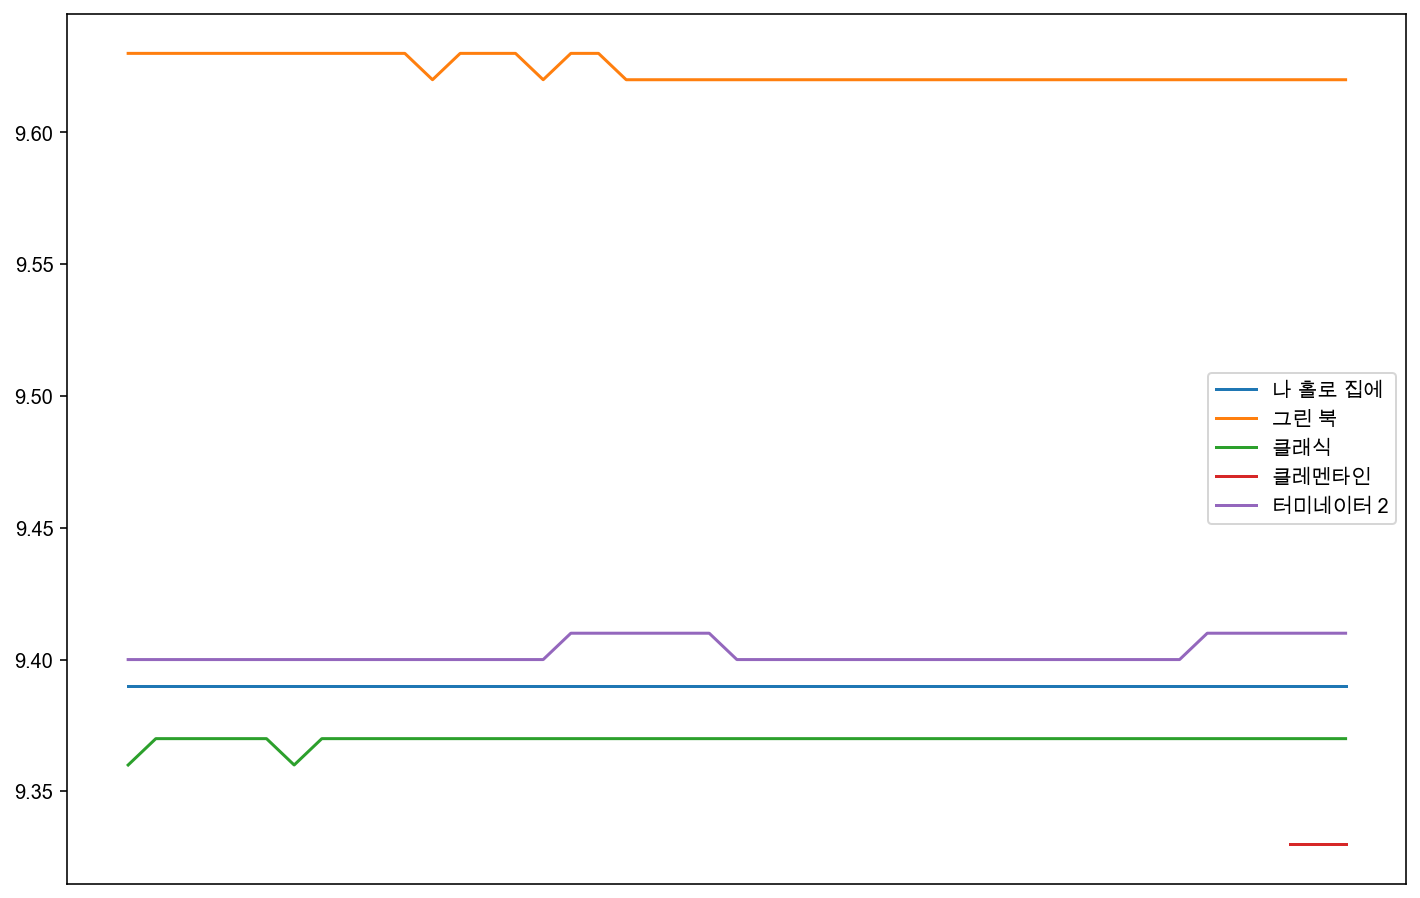

In [102]:
target_col = ["나 홀로 집에", "그린 북", "클래식", "클레멘타인", "터미네이터 2"]
plt.figure(figsize=(12,8))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.tick_params(bottom=False, labelbottom=False)
plt.show()